import these:

In [85]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

print('done')


done


load data:

In [70]:
(mnist_X, mnist_y), (X_final_te, y_final_te) = tf.keras.datasets.fashion_mnist.load_data()
mnist_y = mnist_y.astype(int)
y_final_te = y_final_te.astype(int)

mnist_X = mnist_X.reshape(60000,28**2) #make each image into a 1d feature vector
X_final_te = X_final_te.reshape(10000,28**2)

print(mnist_X.shape)
print(mnist_y.shape)
print(X_final_te.shape)
print(y_final_te.shape)

training_set_sizes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
labels = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

X_tr, X_te, y_tr, y_te = train_test_split(mnist_X, mnist_y, test_size=0.25, shuffle=True)

#use X_tr, y_tr for training
#use X_te, y_te for testing
#use X_final_te, y_final_te for end evaluations




(60000, 784)
(60000,)
(10000, 784)
(10000,)


print some data

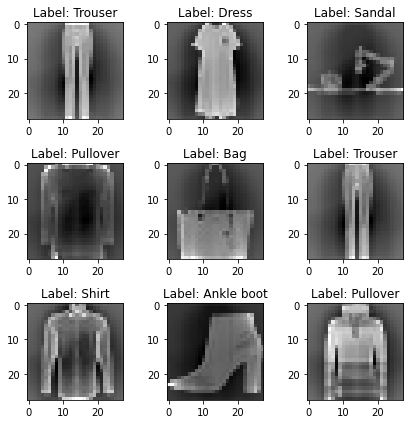

In [80]:
# Some default settings for our plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Create a figure with 3 rows and 3 columns
figure, axes = plt.subplots(3, 3, figsize=(6, 6))  

### YOUR CODE STARTS HERE ###
# Plot the first 9 images in our dataset.
# Include a title on each subplot to indicate the corresponding label.
for x in range(9):
    img = X_tr[x].reshape(28, 28)
    axes[x%3,x//3].imshow(img, cmap="gray")
    label = y_tr[x]
    axes[x%3,x//3].set_title(f'Label: {labels[label]}')


### YOUR CODE ENDS HERE  ###

plt.tight_layout()

In [79]:
#preprocessing:

#items = [X_final_te,X_tr,X_te]

s = StandardScaler()
s.fit(X_final_te)
X_final_te = s.transform(X_final_te)

s = StandardScaler()
s.fit(X_tr)
X_tr = s.transform(X_tr)

s = StandardScaler()
s.fit(X_te)
X_te = s.transform(X_te)

[[-0.00826034 -0.02251163 -0.04669937 ... -0.15786973 -0.0891957
  -0.0339595 ]
 [-0.00826034 -0.02251163 -0.04669937 ... -0.15786973 -0.0891957
  -0.0339595 ]
 [-0.00826034 -0.02251163 -0.04669937 ... -0.15786973 -0.0891957
  -0.0339595 ]
 ...
 [-0.00826034 -0.02251163 -0.04669937 ... -0.15786973 -0.0891957
  -0.0339595 ]
 [-0.00826034 -0.02251163 -0.04669937 ... -0.15786973 -0.0891957
  -0.0339595 ]
 [-0.00826034 -0.02251163 -0.04669937 ...  3.37266877 -0.0891957
  -0.0339595 ]]


logistic classifier:

feedforward neural network:

In [92]:
lrs = [0.001,0.005,0.01,0.05]
activations = ['relu','logistic','tanh']
widths = [50,100,200]
depths = [1,3,5,10]

training_scores = {}
testing_scores = {}

params = []

for lr in lrs:
    for ac in activations:
        for w in widths:
            for d in depths:
                params.append((lr,ac,w,d))
random.shuffle(params)

#training fNNs on 60k images takes really long, only using first 10k images
sX_tr = X_tr[:10000]
sy_tr = y_tr[:10000]

for param in params:
    print(f'parameters: {param}, ', end='')
    clf = MLPClassifier(hidden_layer_sizes = (param[2],param[3]), activation = param[1], solver = 'sgd', learning_rate_init = param[0])
    clf.fit(sX_tr, sy_tr)
    training_scores[param] = clf.score(sX_tr, sy_tr)
    testing_scores[param] = clf.score(X_te, y_te)
    print(f'score: {testing_scores[param]}')
    
#print parameters in order of their scoring
results = [f"{key}, {value}" for (key, value) in sorted(testing_scores.items(), key=lambda x : x[1])]
for i in results:
    print(i)

parameters: (0.005, 'relu', 200, 1), 

/Users/jamesyao-smith/opt/anaconda3/envs/firstEnv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


score: 0.4078
parameters: (0.05, 'relu', 200, 1), 

/Users/jamesyao-smith/opt/anaconda3/envs/firstEnv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


score: 0.2768
parameters: (0.05, 'logistic', 200, 3), 

/Users/jamesyao-smith/opt/anaconda3/envs/firstEnv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


score: 0.21853333333333333
parameters: (0.05, 'logistic', 50, 5), 

/Users/jamesyao-smith/opt/anaconda3/envs/firstEnv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/jamesyao-smith/opt/anaconda3/envs/firstEnv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


score: 0.5948666666666667
parameters: (0.05, 'relu', 200, 3), score: 0.6408666666666667
parameters: (0.01, 'logistic', 200, 3), 

/Users/jamesyao-smith/opt/anaconda3/envs/firstEnv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")

KeyboardInterrupt

